## Анализ точности моделей посимвольной генерации ответа в чатботе

### Смотрим на результаты работы двух моделей генерации ответа:
1) нейросетевая https://github.com/Koziev/chatbot/blob/master/PyModels/qa_chargenerator_model.py   
2) классификационная на базе XGBoost https://github.com/Koziev/chatbot/blob/master/PyModels/xgb_answer_generator.py    

In [39]:
from __future__ import print_function
import random
import codecs
import pandas as pd
import numpy as np
import itertools
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# Нейросетевая модель в https://github.com/Koziev/chatbot/blob/master/PyModels/qa_chargenerator_model.py
df1 = pd.read_csv(u'../../tmp/qa_chargenerator_model.accuracy.csv', encoding='utf-8', delimiter='\t', index_col=None)

# классификационная модель
df2 = pd.read_csv(u'../../tmp/xgb_answer_generator.accuracy.csv', encoding='utf-8', delimiter='\t', index_col=None)

In [41]:
df1.describe()

,answer_len,nb_samples,accuracy
count,30.000000,30.000000,30.000000
mean,15.500000,413.333333,0.580719
std,8.803408,515.644982,0.263525
min,1.000000,17.000000,0.000000
25%,8.250000,49.250000,0.431777
50%,15.500000,210.500000,0.635907
75%,22.750000,563.250000,0.728092
max,30.000000,2147.000000,0.993754


### Количество сэмплов в валидационном наборе с ответами разной длины

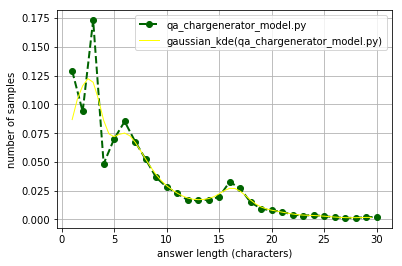

In [61]:
total_nb_samples = sum(df1['nb_samples'])

# Частота вопроса разной длины как есть:
plt.plot(df1['answer_len'].values, df1['nb_samples']/total_nb_samples, color='darkgreen', marker='o', linestyle='dashed',
        linewidth=2, markersize=6, label='qa_chargenerator_model.py')

# Более гладкий вариант с помощью https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
nb_samples_dataset = []
for i, r in df1.iterrows():
    answer_len = int(r['answer_len'])
    nb_samples = int(r['nb_samples'])
    nb_samples_dataset.extend(itertools.repeat(answer_len, nb_samples))
    
nb_samples_kde=gaussian_kde(nb_samples_dataset)
answer_lens1 = np.arange(1, max(df['answer_len'].values), 0.5)
plt.plot(answer_lens1, nb_samples_kde(answer_lens1), color='yellow', marker=None, linestyle='solid',
        linewidth=1, markersize=2, label='gaussian_kde(qa_chargenerator_model.py)')

plt.grid()
plt.ylabel('number of samples')
plt.xlabel('answer length (characters)')
plt.legend()
plt.show()

### Точность per instance генерации ответа разной длины

In [ ]:
# Ошибка в одном символе относит сгенерированный ответ к невалидным

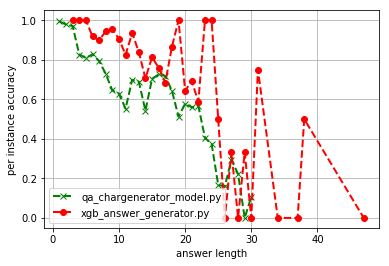

In [65]:
plt.plot(df1['answer_len'].values, df1['accuracy'].values, color='green', marker='x', linestyle='dashed',
         linewidth=2, markersize=6, label='qa_chargenerator_model.py')

plt.plot(df2['answer_len'].values, df2['accuracy'].values, color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=6, label='xgb_answer_generator.py')

plt.grid()
plt.xlabel('answer length')
plt.ylabel('per instance accuracy')
plt.legend()
plt.show()         